In [26]:
# Install required libraries
!pip install nltk matplotlib

# Import necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt


In [27]:
# Download required NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91738\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91738\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91738\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91738\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Creating analyzer (main code)

In [28]:
# Create a Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Extend the VADER lexicon with custom words
custom_lexicon = {
    'like': 1,    # Positive
    'hate': -1,   # Negative
    'good': 1,    # Positive
    'bad': -1,    # Negative
    'neutral': 0, # Neutral
}
sia.lexicon.update(custom_lexicon)

def preprocess_sentence(sentence):
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove punctuation
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sentence)
    filtered_sentence = ' '.join([word for word in words if word not in stop_words])
    return filtered_sentence

def handle_negations(words):
    negations = ["not", "no", "never", "none"]
    for i in range(len(words)-1):
        if words[i] in negations:
            words[i+1] = f"not_{words[i+1]}"
    return [word for word in words if word not in negations]

def classify_word_sentiment(word):
    sentiment = sia.polarity_scores(word)
    word_score = sentiment['compound']
    if word_score > 0:
        return f"{word} is Positive"
    elif word_score < 0:
        return f"{word} is Negative"
    else:
        return f"{word} is Neutral"

def classify_sentence_sentiment(sentence):
    # Preprocess the sentence
    sentence = preprocess_sentence(sentence)
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Handle negations
    words = handle_negations(words)
    # POS tagging
    pos_tags = nltk.pos_tag(words)
    # Classify the sentiment of each word
    word_sentiments = [classify_word_sentiment(word) for word, tag in pos_tags if tag.startswith('JJ') or tag.startswith('RB') or tag.startswith('NN')]
    # Calculate the overall sentiment of the sentence
    sentiment = sia.polarity_scores(' '.join(words))
    sentiment_score = sentiment['compound']
    if sentiment_score > 0:
        overall_sentiment = "Positive"
    elif sentiment_score < 0:
        overall_sentiment = "Negative"
    else:
        overall_sentiment = "Neutral"
    return overall_sentiment, sentiment_score, word_sentiments

def classify_paragraph_sentiment(paragraph):
    sentences = sent_tokenize(paragraph)
    sentence_sentiments = []
    for sentence in sentences:
        overall_sentiment, sentiment_score, word_sentiments = classify_sentence_sentiment(sentence)
        sentence_sentiments.append((sentence, overall_sentiment, sentiment_score, word_sentiments))
    return sentence_sentiments


In [29]:
def visualize_sentiment(sentiments):
    sentences = [s[0] for s in sentiments]
    scores = [s[2] for s in sentiments]
    plt.figure(figsize=(10, 6))
    plt.barh(sentences, scores, color='skyblue')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Sentences')
    plt.title('Sentiment Analysis')
    plt.show()


Sentence: get lost
Overall sentiment: Negative
Sentiment score: -0.3182
Word sentiments:
  get is Neutral



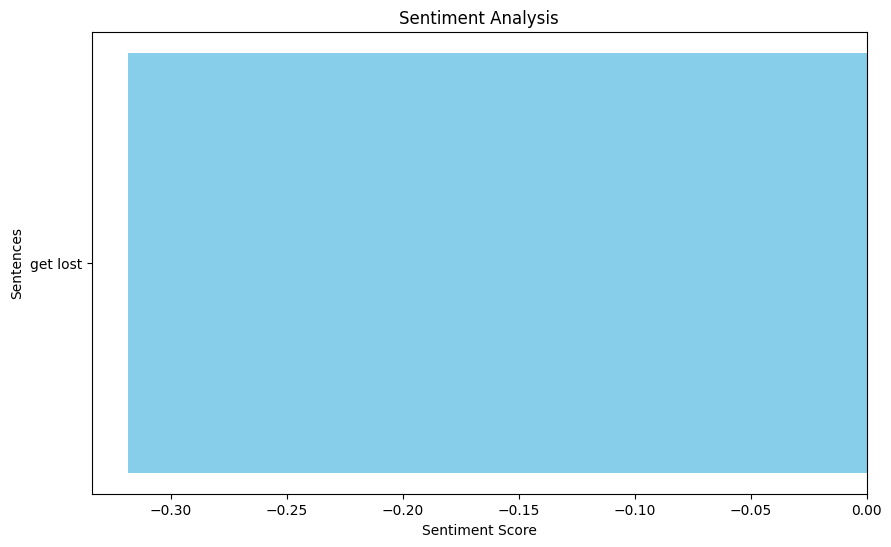

In [30]:
# Interactive input for sentiment analysis
sample_paragraph = input("Enter a sentence or paragraph for sentiment analysis: ")

if sample_paragraph.strip():
    sentence_sentiments = classify_paragraph_sentiment(sample_paragraph)

    for sentence, overall_sentiment, sentiment_score, word_sentiments in sentence_sentiments:
        print(f"Sentence: {sentence}")
        print(f"Overall sentiment: {overall_sentiment}")
        print(f"Sentiment score: {sentiment_score}")
        print("Word sentiments:")
        for word_sentiment in word_sentiments:
            print(f"  {word_sentiment}")
        print()

    visualize_sentiment(sentence_sentiments)
else:
    print("Error: Input cannot be empty.")
